<a href="https://colab.research.google.com/github/kelvinfoo123/MH3510-Regression-Analysis/blob/main/MH3510_Capstone_Project_(Medical_Cost_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Basic details of dataset**

In [2]:
print('The shape of the dataset is ', insurance.shape)

The shape of the dataset is  (1338, 7)


In [3]:
insurance.isnull().sum() # There are no null values in this dataset.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Exploratory data analysis**

**Gender**

In [8]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

The dataset is balanced in the gender. There is an equal number of males and females in the dataset.

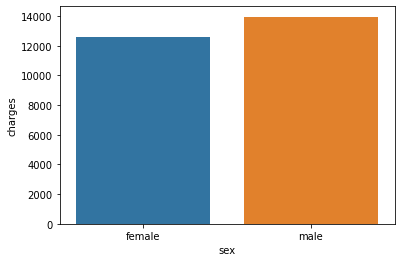

In [10]:
# See if there is a relationship between gender and medical cost.
sns.barplot(x = 'sex', y = 'charges', data = insurance, ci = False)

The average medical cost for male is higher than that of female by $2000.

**Age**

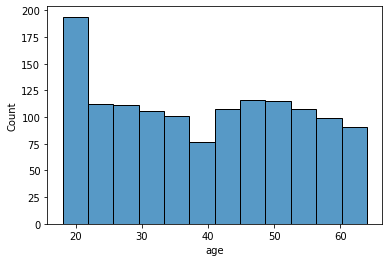

In [5]:
sns.histplot(x = 'age', data = insurance)

Majority of the people being surveyed are in their 20s.

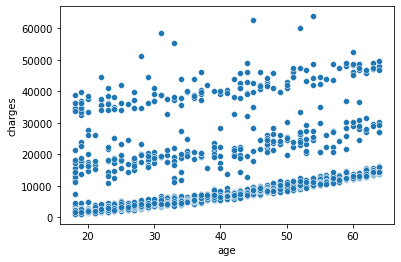

In [7]:
# See if there is a relationship between age and medical cost. 
sns.scatterplot(x = 'age', y = 'charges', data = insurance)

As age increases, medical cost generally increases. In fact, it seems to follow a linear relationship. However, there seems to be 3 different groups in this scatterplot. 

**bmi**

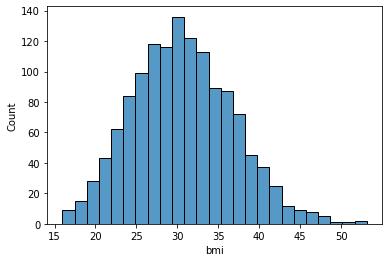

In [11]:
sns.histplot(x = 'bmi', data = insurance)

The bmi follows a normal distribution that is slightly right skewed.

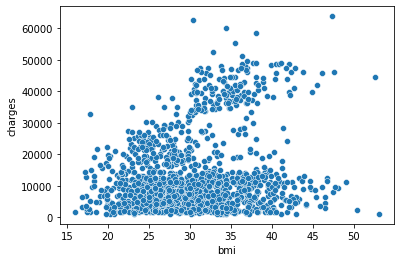

In [12]:
# Determine if bmi affects medical cost.
sns.scatterplot(x = 'bmi', y = 'charges', data = insurance)

There appears to be low correlation between bmi and medical cost. Most people have medical cost between 0 to 20 000 regardless of their bmi.

In [14]:
insurance['bmi'].corr(insurance['charges']) # Low correlation between bmi and medical cost

0.19834096883362895

**Smoker**

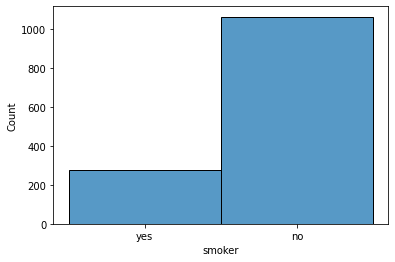

In [15]:
sns.histplot(x = 'smoker', data = insurance)

There is significantly more non-smoker than smokers.

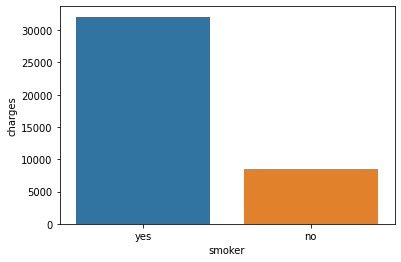

In [17]:
sns.barplot(x = 'smoker', y = 'charges', data = insurance, ci = False)

Medical costs for smokers are much higher than that of non-smokers. This is understandable as they have higher chances of getting respiratory related illnesses.

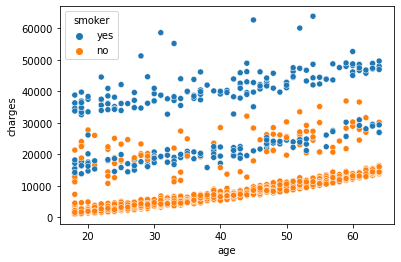

In [19]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = insurance)

Most non-smokers occupy the group with lower medical cost. Across all ages, smokers have higher medical cost.

We see that there is an interaction between age and smoker. We can take this into consideration when building the regression model.

**children**

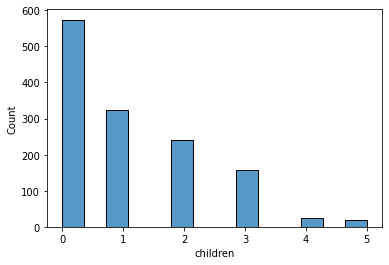

In [20]:
sns.histplot(x = 'children', data = insurance)

Most people in the study have no children.

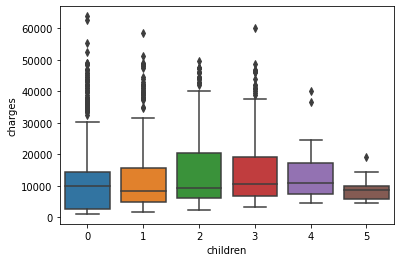

In [25]:
# Determine if number of kids affect medical cost.
sns.boxplot(x = 'children', y = 'charges', data = insurance)

There appears to be no correlation between number of children and medical cost.

**region**

In [26]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

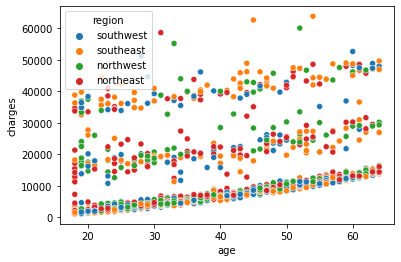

In [27]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'region', data = insurance)

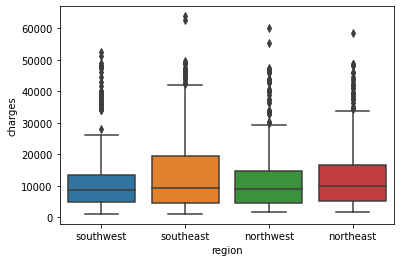

In [28]:
sns.boxplot(x = 'region', y = 'charges', data = insurance)

There is little correlation between region and medical cost.

In summary, the main factors affecting medical cost are gender, age and smoking habits.

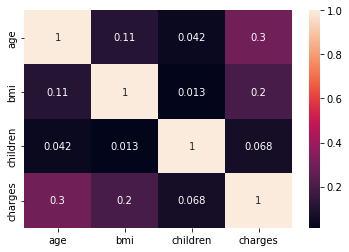

In [29]:
sns.heatmap(insurance.corr(), annot = True)

From the correlation plot, bmi should also be a factor to consider when building the regression model as its correlation value wrt charges is close to that of age wrt charges.

## **Two-way ANOVA**
We use two-way anova to investigate if the interaction between age and smoking habit is significant in predicting medical cost.

In [31]:
from scipy import stats 
from statsmodels.formula.api import ols 
import statsmodels.stats.api as sms 
from statsmodels.graphics.factorplots import interaction_plot

In [33]:
model_two_way_anova = ols('charges ~ C(age) + C(smoker) + C(age):C(smoker)', data = insurance).fit()
sms.anova_lm(model_two_way_anova, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(age),46.0,2.428817e+10,5.280038e+08,13.553656,2.488396e-80
C(smoker),1.0,1.192054e+11,1.192054e+11,3059.956164,0.000000e+00
C(age):C(smoker),46.0,4.118730e+09,8.953761e+07,2.298396,2.774934e-06
Residual,1244.0,4.846196e+10,3.895656e+07,NaN,NaN


The interaction between age and smoking habit is significant in predicting medical cost since the p-value is lower than 0.05.

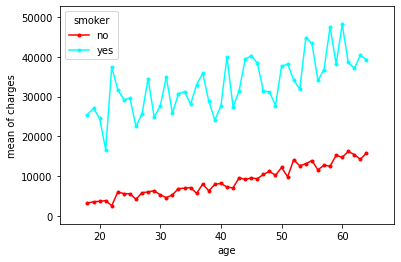

In [34]:
interaction_plot(insurance['age'], insurance['smoker'], insurance['charges']).show()

Smokers have much higher medical cost compared to non-smokers across all age range.

## **One-way ANOVA**
We use one-way ANOVA to investigate the significance of the other factors in predicting medical cost.

In [37]:
one_way_gender = ols('charges ~ sex', data = insurance).fit()
sms.anova_lm(one_way_gender)

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,6.435902e+08,6.435902e+08,4.399702,0.036133
Residual,1336.0,1.954306e+11,1.462804e+08,NaN,NaN


In [38]:
one_way_bmi = ols('charges ~ bmi', data = insurance).fit()
sms.anova_lm(one_way_bmi)

,df,sum_sq,mean_sq,F,PR(>F)
bmi,1.0,7.713391e+09,7.713391e+09,54.709308,2.459086e-13
Residual,1336.0,1.883608e+11,1.409886e+08,NaN,NaN


In [39]:
one_way_children = ols('charges ~ children', data = insurance).fit()
sms.anova_lm(one_way_children)

,df,sum_sq,mean_sq,F,PR(>F)
children,1.0,9.065999e+08,9.065999e+08,6.206037,0.012852
Residual,1336.0,1.951676e+11,1.460835e+08,NaN,NaN


In [40]:
one_way_region = ols('charges ~ region', data = insurance).fit()
sms.anova_lm(one_way_region)

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,1.300760e+09,4.335866e+08,2.969627,0.030893
Residual,1334.0,1.947735e+11,1.460071e+08,NaN,NaN


All factors above are significant at predicting medical cost at the 95% confidence level since their p-values are lower than 0.05.

## **Data preparation**

In [62]:
# Convert categorical variables to numeric variables 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoded_sex = le.fit_transform(insurance['sex'])
encoded_smoker = le.fit_transform(insurance['smoker'])
encoded_region = le.fit_transform(insurance['region'])

insurance.drop(['sex', 'smoker', 'region'], axis = 1, inplace = True)
insurance['sex'] = encoded_sex 
insurance['smoker'] = encoded_smoker 
insurance['region'] = encoded_region

insurance.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


## **Building regression model**

In [47]:
X_ols = insurance 

In [50]:
model_0 = ols(formula = 'charges ~ bmi + children + sex + region + smoker * age', data = X_ols).fit()
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     573.5
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        06:07:48   Log-Likelihood:                -13547.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.15e+04    978.800    -11.746      0.0

From the p-value, we see that we can drop the variable sex. We see that the interaction term between smoker and age also has a high p-value.

In [51]:
model_1 = ols(formula = 'charges ~ bmi + children + region + smoker + age', data = X_ols).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Mon, 02 Jan 2023   Prob (F-statistic):               0.00
Time:                        06:10:02   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.187e+04    945.876    -12.546      0.0

All the variables are significant. We can build the linear regression using this model. 

The adjusted R-squared is 0.751. This implies that the model explains 75% of the variability in medical prices. 

Inferring the coefficients of the variables, 
- Holding all other variables constant, a unit increase in bmi increases medical cost by $332. 

- Holding all other variables constant, having one more children increases medical cost by $478. 

- Holding all other variables constant, being a smoker increases medical cost by $2380.

The AIC is high as well.

In [63]:
X = insurance.drop(['sex', 'charges'], axis = 1)
y = insurance['charges']

In [64]:
X.head()

,age,bmi,children,smoker,region
0,19,27.900,0,1,3
1,18,33.770,1,0,2
2,28,33.000,3,0,2
3,33,22.705,0,0,1
4,32,28.880,0,0,1


In [65]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [68]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

5800.056649417455

## **Check assumptions of model**

**Residual plot against fitted response**

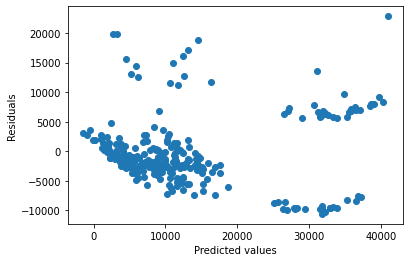

In [71]:
residuals = y_test - y_pred
plt.plot(y_pred, residuals, 'o')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

There is no correlation between the predicted and residual values. 

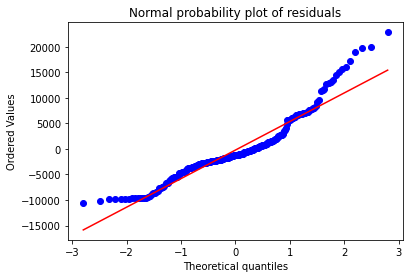

In [72]:
from scipy.stats import probplot 
_, (__, ___, r) = probplot(residuals, plot=plt)
plt.title('Normal probability plot of residuals')
plt.show()

The plot is nearly linear. Hence, the error distribution is normal. 